In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import make_classification

In [60]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, 
                          n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=7)

In [61]:
# Now it has two features and 1 target column

In [62]:
X

array([[ 0.10565225, -0.11697552],
       [-0.34241549, -0.73115232],
       [-0.4480856 , -0.7081059 ],
       [-1.08137751, -2.01199214],
       [-0.29443471,  1.63493163],
       [-0.32292367,  0.15599044],
       [-1.28258259,  1.07782053],
       [-0.0079345 ,  0.80626713],
       [-0.65224819,  0.74859527],
       [-1.45025507,  0.75152794],
       [-1.26880192, -0.90114581],
       [-1.27037098, -0.1815243 ],
       [-0.11553671, -2.98092432],
       [ 0.71203911,  1.20500136],
       [-1.31752459,  0.78302407],
       [ 0.29371208,  0.42968688],
       [-0.23468188, -0.73229726],
       [-1.37007185, -0.83930476],
       [-0.27592431,  0.83727062],
       [-1.26110778, -0.10255323],
       [-1.76709273,  0.65867001],
       [-1.55570747,  0.92649819],
       [-0.80741796,  0.10216193],
       [ 1.51683739,  0.46886454],
       [-0.70701639,  0.45432938],
       [ 0.5203771 ,  1.8613386 ],
       [-1.27812201, -0.79255991],
       [-0.53200406, -1.0004391 ],
       [-1.89118829,

In [63]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [64]:
X.shape

(100, 2)

In [65]:
y.shape

(100,)

In [66]:
y = y.reshape(-1,1)

In [67]:
y.shape

(100, 1)

In [68]:
df = pd.DataFrame(np.concatenate([X,y], axis=1), columns=['feature1', 'feature2', 'target'])

In [69]:
df

,feature1,feature2,target
0,0.105652,-0.116976,1.0
1,-0.342415,-0.731152,1.0
2,-0.448086,-0.708106,1.0
3,-1.081378,-2.011992,0.0
4,-0.294435,1.634932,1.0
...,...,...,...
95,-1.613840,0.661988,0.0
96,-1.026511,0.071533,0.0
97,-0.950860,0.323236,0.0
98,0.742671,-0.345742,1.0


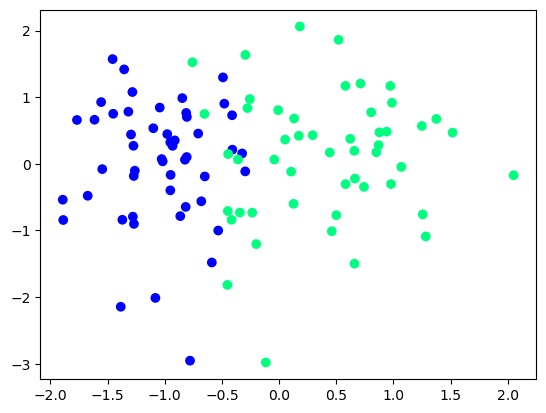

In [70]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df.iloc[:,-1], cmap='winter');

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
lr = LogisticRegression()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=.2, random_state=42)

In [75]:
X_train.shape, y_train.shape

((80, 2), (80,))

In [76]:
X_test.shape, y_test.shape

((20, 2), (20,))

In [77]:
lr.fit(X_train, y_train)

LogisticRegression()

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
print('accuracy score is:', accuracy_score(y_test, lr.predict(X_test)))

accuracy score is: 0.95


In [80]:
confusion_matrix(y_test, lr.predict(X_test))

array([[ 6,  1],
       [ 0, 13]], dtype=int64)

In [83]:
classification_report(y_test, lr.predict(X_test))

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.86      0.92         7\n         1.0       0.93      1.00      0.96        13\n\n    accuracy                           0.95        20\n   macro avg       0.96      0.93      0.94        20\nweighted avg       0.95      0.95      0.95        20\n'